🚀 ExoHabitAI — EDA Pipeline Started
📂 Corrected Path: d:\Infosys Springboard Internship\ExoHabitAI\data\raw\PS_2026.01.19_01.24.31.csv
📡 File Exists: True

🛰️ Reading NASA Exoplanet Archive CSV...

✅ Dataset Loaded Successfully
Shape: (39251, 289)

================ DATA HEAD ================


,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_dr2_id,gaia_dr3_id,default_flag,...,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,0,...,2014-07-23,2011-08,2014-07-23,2.0,1.0,2.0,0.0,0.0,0.0,0.0
1,2,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,1,...,2023-09-19,2023-08,2023-09-19,2.0,1.0,2.0,0.0,0.0,0.0,0.0
2,3,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,0,...,2014-05-14,2008-01,2014-05-14,2.0,1.0,2.0,0.0,0.0,0.0,0.0
3,4,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,Gaia DR3 1696798367260229376,1,...,2018-09-04,2017-03,2018-09-06,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,5,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,Gaia DR3 1696798367260229376,0,...,2018-04-25,2009-10,2014-05-14,0.0,1.0,1.0,0.0,0.0,0.0,0.0



================ COLUMN COUNT ================
289

================ COLUMN LIST ================


,Columns
0,rowid
1,pl_name
2,hostname
3,pl_letter
4,hd_name
...,...
284,st_nrvc
285,st_nspec
286,pl_nespec
287,pl_ntranspec



================ TOP 20 MISSING (%) ================


sy_kepmagerr2       100.000000
sy_kepmagerr1       100.000000
sy_icmagerr1         99.898092
sy_icmagerr2         99.898092
pl_occdeperr2        99.887901
pl_occdeperr1        99.887901
sy_icmag             99.885353
pl_occdep            99.880258
pl_occdeplim         99.880258
pl_trueobliqerr1     99.842042
pl_trueobliqerr2     99.842042
pl_trueobliq         99.829304
pl_trueobliqlim      99.829304
pl_cmassjerr2        99.785993
pl_cmassjerr1        99.785993
pl_cmasseerr2        99.785993
pl_cmasseerr1        99.785993
pl_cmasselim         99.775802
pl_cmassj            99.775802
pl_cmassjlim         99.775802
dtype: float64

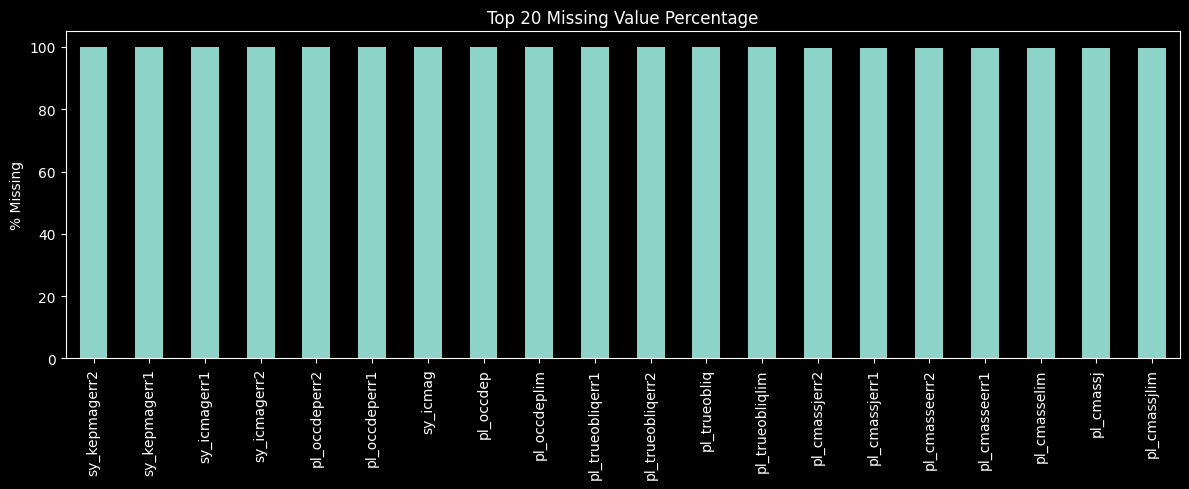


================ NUMERIC SUMMARY ================


,count,mean,std,min,25%,50%,75%,max
rowid,39251.0,19626.000000,1.133093e+04,1.000000e+00,9813.500000,19626.000000,29438.500000,39251.0
default_flag,39251.0,0.154901,3.618144e-01,0.000000e+00,0.000000,0.000000,0.000000,1.0
sy_snum,39251.0,1.085297,3.085377e-01,1.000000e+00,1.000000,1.000000,1.000000,4.0
sy_pnum,39251.0,1.918015,1.238266e+00,1.000000e+00,1.000000,1.000000,2.000000,8.0
sy_mnum,39251.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0
cb_flag,39251.0,0.002420,4.913781e-02,0.000000e+00,0.000000,0.000000,0.000000,1.0
disc_year,39251.0,2015.540190,4.010208e+00,1.992000e+03,2014.000000,2016.000000,2016.000000,2026.0
rv_flag,39231.0,0.250822,4.334918e-01,0.000000e+00,0.000000,0.000000,1.000000,1.0
pul_flag,39231.0,0.000331,1.820080e-02,0.000000e+00,0.000000,0.000000,0.000000,1.0
ptv_flag,39231.0,0.000051,7.139943e-03,0.000000e+00,0.000000,0.000000,0.000000,1.0



🧠 Scientific Features Found: ['pl_rade', 'pl_eqt', 'pl_orbper', 'st_teff', 'st_mass', 'st_rad']


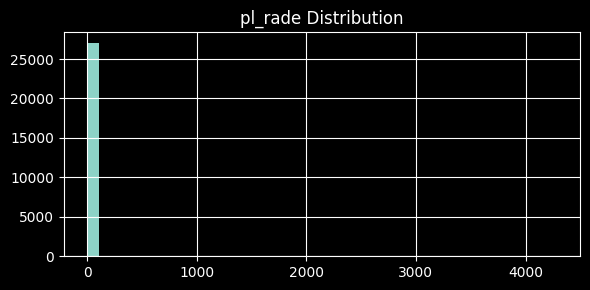

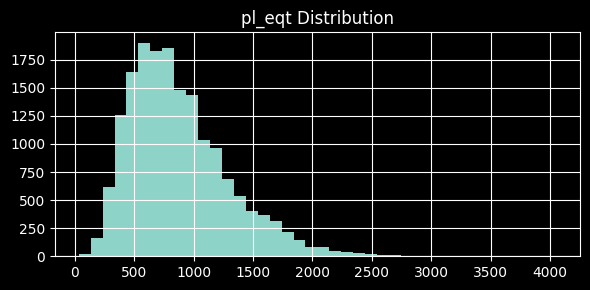

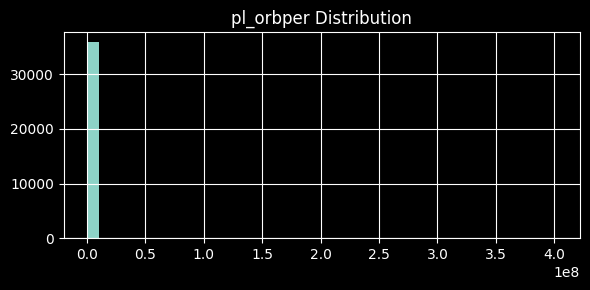

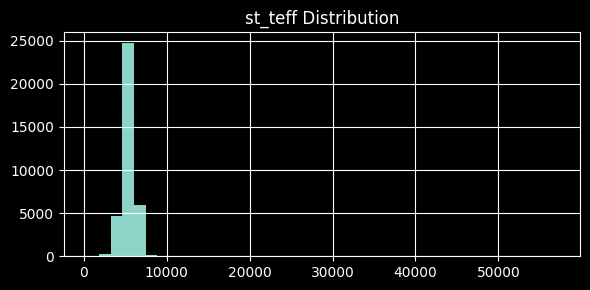

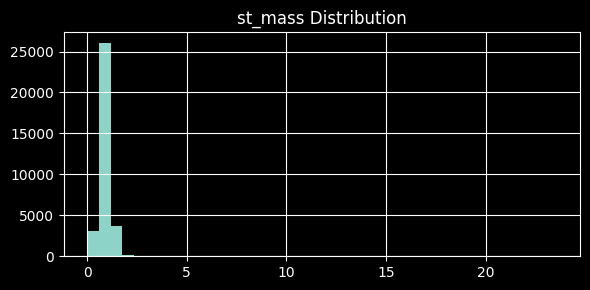

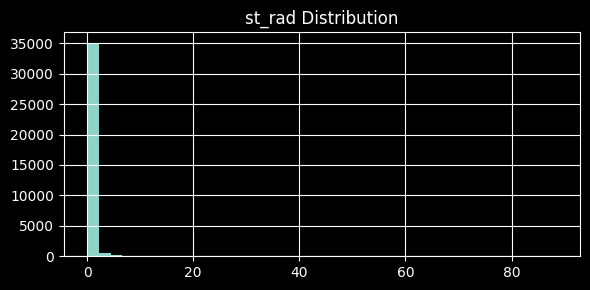


📊 Generating Correlation Heatmap...


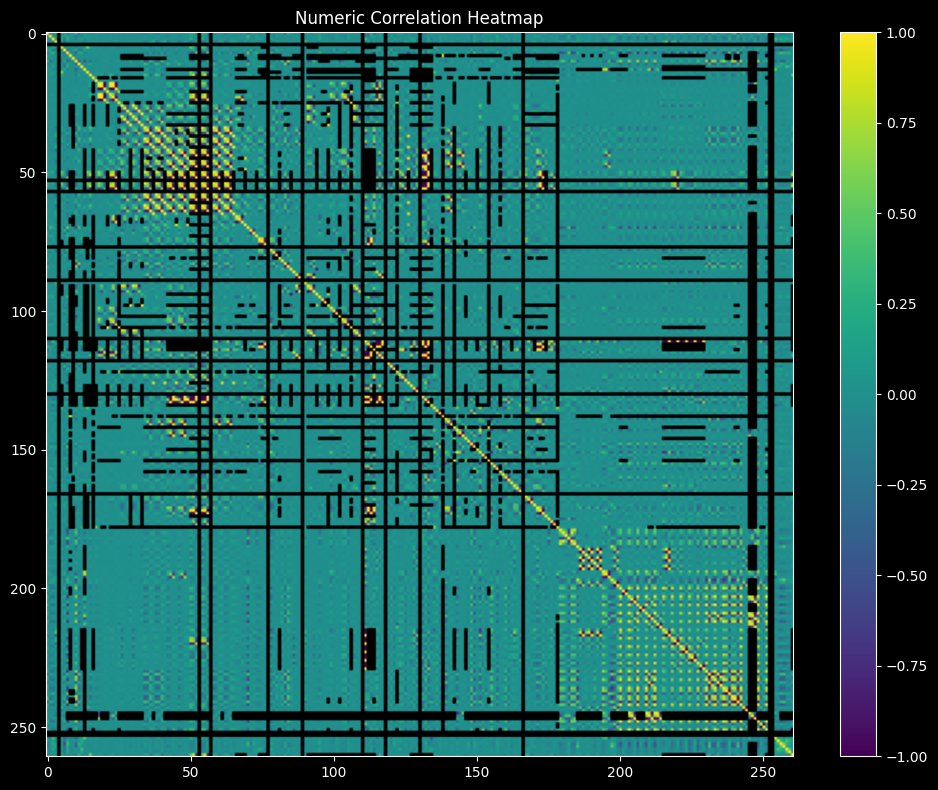


🧪 SCIENTIFIC INSIGHTS:
🌍 Earth-sized planets: 10886
🔥 Potential habitable temperature planets: 876

💾 Dataset Memory Usage: 155.23 MB

🚀 LEVEL-200 EDA COMPLETE — READY FOR FEATURE ENGINEERING


In [6]:
# ============================================================
# 🚀 EXOHABITAI — NASA LEVEL EDA PIPELINE (LEVEL-200 FINAL)
# SINGLE COPY-PASTE VERSION — PATH FIXED + PRO IMPROVED
# ============================================================

# ============================================================
# 1️⃣ MISSION SETUP
# ============================================================

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("dark_background")

print("🚀 ExoHabitAI — EDA Pipeline Started")

# ============================================================
# 🌌 AUTO PROJECT ROOT DETECTION (CRITICAL FIX)
# ============================================================

# Current working folder (notebooks)
CURRENT_DIR = os.getcwd()

# Move ONE LEVEL UP -> ExoHabitAI root
PROJECT_ROOT = os.path.dirname(CURRENT_DIR)

RAW_DATA_PATH = os.path.join(
    PROJECT_ROOT,
    "data",
    "raw",
    "PS_2026.01.19_01.24.31.csv"
)

print("📂 Corrected Path:", RAW_DATA_PATH)
print("📡 File Exists:", os.path.exists(RAW_DATA_PATH))

# ============================================================
# 2️⃣ LOAD DATASET (NASA SAFE FORMAT) — LEVEL-300 FIX
# ============================================================

if not os.path.exists(RAW_DATA_PATH):
    raise FileNotFoundError(
        f"Dataset not found.\nExpected location:\n{RAW_DATA_PATH}"
    )

print("\n🛰️ Reading NASA Exoplanet Archive CSV...")

df = pd.read_csv(
    RAW_DATA_PATH,
    comment="#",          # Skip NASA metadata header lines
    sep=",",
    engine="python",      # Required for complex rows
    on_bad_lines="skip",  # Ignore malformed rows safely
    encoding="utf-8"
)

print("\n✅ Dataset Loaded Successfully")
print("Shape:", df.shape)
# ============================================================
# 3️⃣ DATASET OVERVIEW
# ============================================================

print("\n================ DATA HEAD ================")
display(df.head())

print("\n================ COLUMN COUNT ================")
print(len(df.columns))

print("\n================ COLUMN LIST ================")
display(pd.DataFrame(df.columns, columns=["Columns"]))

# ============================================================
# 4️⃣ MISSING VALUE ANALYSIS
# ============================================================

missing = (df.isna().mean() * 100).sort_values(ascending=False)

print("\n================ TOP 20 MISSING (%) ================")
display(missing.head(20))

plt.figure(figsize=(12,5))
missing.head(20).plot(kind="bar")
plt.title("Top 20 Missing Value Percentage")
plt.ylabel("% Missing")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# ============================================================
# 5️⃣ NUMERIC SUMMARY
# ============================================================

print("\n================ NUMERIC SUMMARY ================")
numeric_summary = df.describe(include="number").T
display(numeric_summary.head(25))

# ============================================================
# 6️⃣ FEATURE DISCOVERY (SCIENCE MODE)
# ============================================================

important_cols = [
    "pl_rade",
    "pl_eqt",
    "pl_orbper",
    "st_teff",
    "st_mass",
    "st_rad"
]

existing_cols = [c for c in important_cols if c in df.columns]

print("\n🧠 Scientific Features Found:", existing_cols)

for col in existing_cols:

    plt.figure(figsize=(6,3))
    df[col].dropna().hist(bins=40)
    plt.title(f"{col} Distribution")
    plt.tight_layout()
    plt.show()

# ============================================================
# 7️⃣ CORRELATION HEATMAP (NUMERIC)
# ============================================================

numeric_df = df.select_dtypes(include="number")

if numeric_df.shape[1] > 0:

    print("\n📊 Generating Correlation Heatmap...")

    corr = numeric_df.corr()

    plt.figure(figsize=(10,8))
    plt.imshow(corr, aspect="auto")
    plt.colorbar()
    plt.title("Numeric Correlation Heatmap")
    plt.tight_layout()
    plt.show()

# ============================================================
# 8️⃣ QUICK SCIENTIFIC INSIGHTS
# ============================================================

print("\n🧪 SCIENTIFIC INSIGHTS:")

if "pl_rade" in df.columns:
    earth_like = df[(df["pl_rade"] >= 0.5) & (df["pl_rade"] <= 2)]
    print("🌍 Earth-sized planets:", len(earth_like))

if "pl_eqt" in df.columns:
    hab_zone = df[(df["pl_eqt"] >= 200) & (df["pl_eqt"] <= 350)]
    print("🔥 Potential habitable temperature planets:", len(hab_zone))

# ============================================================
# 9️⃣ MEMORY REPORT (NASA BIG DATA SAFE)
# ============================================================

mem_mb = df.memory_usage(deep=True).sum() / 1024**2
print(f"\n💾 Dataset Memory Usage: {mem_mb:.2f} MB")

# ============================================================
# 🎉 MISSION COMPLETE
# ============================================================

print("\n🚀 LEVEL-200 EDA COMPLETE — READY FOR FEATURE ENGINEERING")